In [83]:
# %load mysettings.py
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.font_manager as fm
import seaborn as sns

np.set_printoptions(precision=4, suppress=True)

pd.options.display.max_rows = 15
pd.options.display.precision=4

mpl.rcParams["axes.unicode_minus"] = False
plt.rcParams["font.family"] = "Malgun Gothic"
plt.rcParams["font.size"] = 9

%matplotlib inline

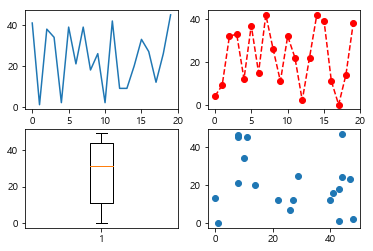

In [60]:
fig = plt.figure()
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(223)
ax4 = fig.add_subplot(224)

ax1.plot(np.random.randint(0, 50, 20));
ax2.plot(np.random.randint(0, 50, 20), "ro--")
ax3.boxplot(np.random.randint(0, 50, 20))
ax4.scatter(np.random.randint(0, 50, 20),
            np.random.randint(0, 50, 20));

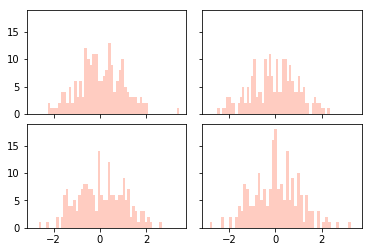

In [15]:
fig, axes = plt.subplots(nrows=2, ncols=2, sharex=True, sharey=True)
plt.subplots_adjust(wspace=0.1, hspace=0.1)

for i in range(2):
    for j in range(2):
        axes[i, j].hist(np.random.randn(200), bins=50, color="#FF5733", alpha=0.3)

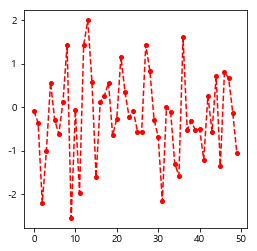

In [61]:
fig = plt.figure(figsize=(4, 4))
plt.plot(np.random.randn(50), "ro--", markersize=4);

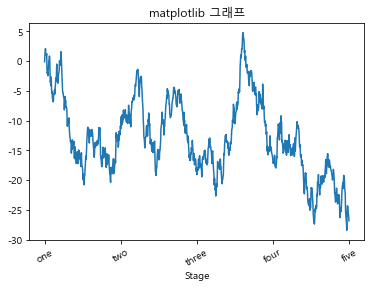

In [62]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(np.random.randn(1000).cumsum())
ax.set_xticks([0, 250, 500, 750, 1000])
ax.set_xticklabels(["one", "two", "three", "four", "five"],
                  rotation=30);
ax.set(**{
    "xlabel": "Stage",
    "title": "matplotlib 그래프"
});

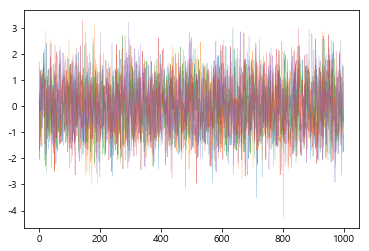

In [63]:
fig = plt.figure()
ax = fig.add_subplot(111)
for i in range(5):  
    ax.plot(np.random.randn(1000), linewidth=0.5, alpha=0.5)

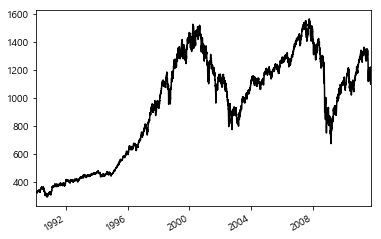

In [68]:
fig = plt.figure()
ax = fig.add_subplot(111)
data = pd.read_csv("spx.csv", index_col=0, parse_dates=True)
spx = data["SPX"]
spx.plot(ax=ax, style="k-");

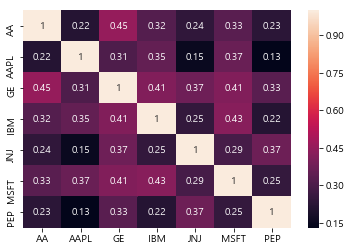

In [87]:
fig = plt.figure()
ax = fig.add_subplot(111)
data = pd.read_csv("stock_px.csv", index_col=0, parse_dates=True)
returns = data.iloc[:, :-2].pct_change()
sns.heatmap(returns.corr(), annot=True);

In [88]:
tips = pd.read_csv("tips.csv")
tips.head()

,total_bill,tip,smoker,day,time,size
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4


In [90]:
tips["tip_pct"] = tips.tip / tips.total_bill
tips.head()

,total_bill,tip,smoker,day,time,size,tip_pct
0,16.99,1.01,No,Sun,Dinner,2,0.0594
1,10.34,1.66,No,Sun,Dinner,3,0.1605
2,21.01,3.50,No,Sun,Dinner,3,0.1666
3,23.68,3.31,No,Sun,Dinner,2,0.1398
4,24.59,3.61,No,Sun,Dinner,4,0.1468


In [89]:
grouped = tips.groupby(["day", "smoker"])
grouped

In [96]:
grouped[["tip_pct"]].agg([np.mean, np.std])

tip_pct        
               mean     std
day  smoker                
Fri  No      0.1517  0.0281
     Yes     0.1748  0.0513
Sat  No      0.1580  0.0398
     Yes     0.1479  0.0614
Sun  No      0.1601  0.0423
     Yes     0.1873  0.1541
Thur No      0.1603  0.0388
     Yes     0.1639  0.0394

In [103]:
grouped.agg({"tip": [np.mean, np.std], "tip_pct": np.std})

tip         tip_pct
               mean     std     std
day  smoker                        
Fri  No      2.8125  0.8985  0.0281
     Yes     2.7140  1.0777  0.0513
Sat  No      3.1029  1.6421  0.0398
     Yes     2.8755  1.6306  0.0614
Sun  No      3.1679  1.2248  0.0423
     Yes     3.5168  1.2612  0.1541
Thur No      2.6738  1.2830  0.0388
     Yes     3.0300  1.1135  0.0394

In [105]:
tips.groupby(["day", "smoker"], as_index=False).mean()

,day,smoker,total_bill,tip,size,tip_pct
0,Fri,No,18.4200,2.8125,2.2500,0.1517
1,Fri,Yes,16.8133,2.7140,2.0667,0.1748
2,Sat,No,19.6618,3.1029,2.5556,0.1580
3,Sat,Yes,21.2767,2.8755,2.4762,0.1479
4,Sun,No,20.5067,3.1679,2.9298,0.1601
5,Sun,Yes,24.1200,3.5168,2.5789,0.1873
6,Thur,No,17.1131,2.6738,2.4889,0.1603
7,Thur,Yes,19.1906,3.0300,2.3529,0.1639
